# Image Classification - Happy or Sad

This notebook demonstrates the process of building and training a Convolutional Neural Network (CNN) model to classify images as "happy" or "sad." We will use TensorFlow and Keras for model creation and training.

```{mermaid}
graph LR
  A[Input Layer] --> B[Convolutional Layer 1]
  B --> C[MaxPooling Layer 1]
  C --> D[Convolutional Layer 2]
  D --> E[MaxPooling Layer 2]
  E --> F[Convolutional Layer 3]
  F --> G[MaxPooling Layer 3]
  G --> H[Flatten Layer]
  H --> I[Dense Layer 1]
  I --> J[Output Layer]

  style A fill:#f9f,stroke:#333,stroke-width:2px
  style B fill:#f9f,stroke:#333,stroke-width:2px
  style C fill:#f9f,stroke:#333,stroke-width:2px
  style D fill:#f9f,stroke:#333,stroke-width:2px
  style E fill:#f9f,stroke:#333,stroke-width:2px
  style F fill:#f9f,stroke:#333,stroke-width:2px
  style G fill:#f9f,stroke:#333,stroke-width:2px
  style H fill:#f9f,stroke:#333,stroke-width:2px
  style I fill:#f9f,stroke:#333,stroke-width:2px
  style J fill:#f9f,stroke:#333,stroke-width:2px

```

## Data Preprocessing

In this section, we load and preprocess the dataset of images representing happy and sad emotions. We remove any images with unsupported file extensions and scale the pixel values to be between 0 and 1 for efficient training.

### Preprocessing Code

In [3]:
# Preprocessing Code
#%pip install tensorflow opencv-python matplotlib 
import tensorflow as tf
import os
# ...

In [4]:
os.path.join("data","happy")

'data/happy'

### Check if a GPU is available

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
len(gpus)

0

### Avoid OOM Errors By Setting GPU Memory Consumption Growth

In [5]:
# Avoid OOM Errors By Setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

### Remove dodgy images

In [6]:
import cv2
import imghdr
import matplotlib.pyplot as plt

/var/folders/v8/l1n5gfyn3zj_f5m_0z4bv2m80000gn/T/ipykernel_4077/2011824555.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [7]:
data_dir = "data"

In [8]:
os.listdir(os.path.join(data_dir,"happy"))

['images26.jpg',
 'images241.jpg',
 'images32.jpg',
 '89ca5d41335b4f9207b9cf03538a7dbd63497e474912837562cb9f58809ac32f._RI_TTW_.png',
 '05-12-21-happy-people.jpg',
 '110754-utyeqqosky-1547658396.jpeg',
 'image22.jpeg',
 'Happy.jpg',
 'images137.jpg',
 'Overtly-Cheerful-Primer-Editorials-min.png',
 'how-happy-are-healthy-people.jpg',
 '170404-happy-workers-feature.jpg',
 'images27.jpg',
 'friends-happy-190821.jpg',
 'images242.jpg',
 'goup-happy-people-group-jumping-isolated-white-background-35582232.jpg',
 'images134.jpg',
 'images120.jpg',
 'GettyImages-454356720.jpg',
 'WorldHappinessReport_620.jpg',
 '_86a43964-aa8e-11e8-82d1-388e3d6e11aa.jpg',
 'images243.jpg',
 'images30.jpg',
 'png-transparent-graphy-happy-people-love-child-photography-thumbnail.png',
 'young-and-happy-people-vector-15114154.jpg',
 'images247.jpg',
 'file-20230208-27-3jttof.jpg',
 'images125.jpg',
 'friends_190412.jpg',
 'images21.jpg',
 'images246.jpg',
 'happy-people-jump-with-raised-arms-characters-win_107791-

In [9]:
image_exts = ["jpg", "jpeg", "png", "bmp"]

In [10]:
image_exts[0]

'jpg'

In [11]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

images26.jpg
images241.jpg
images32.jpg
89ca5d41335b4f9207b9cf03538a7dbd63497e474912837562cb9f58809ac32f._RI_TTW_.png
05-12-21-happy-people.jpg
110754-utyeqqosky-1547658396.jpeg
image22.jpeg
Happy.jpg
images137.jpg
Overtly-Cheerful-Primer-Editorials-min.png
how-happy-are-healthy-people.jpg
170404-happy-workers-feature.jpg
images27.jpg
friends-happy-190821.jpg
images242.jpg
goup-happy-people-group-jumping-isolated-white-background-35582232.jpg
images134.jpg
images120.jpg
GettyImages-454356720.jpg
WorldHappinessReport_620.jpg
_86a43964-aa8e-11e8-82d1-388e3d6e11aa.jpg
images243.jpg
images30.jpg
png-transparent-graphy-happy-people-love-child-photography-thumbnail.png
young-and-happy-people-vector-15114154.jpg
images247.jpg
file-20230208-27-3jttof.jpg
images125.jpg
friends_190412.jpg
images21.jpg
images246.jpg
happy-people-jump-with-raised-arms-characters-win_107791-14884.jpg
images250.jpg
images23.jpg
happy-peaceful.jpg
images132.jpg
MV5BMTM3ODM0NTQ1MF5BMl5BanBnXkFtZTcwMzAxMTM5OA._V1_FMjpg

In [12]:
img = cv2.imread(os.path.join(data_dir, "happy", "_86a43964-aa8e-11e8-82d1-388e3d6e11aa.jpg"))

In [13]:
img.shape

(540, 960, 3)

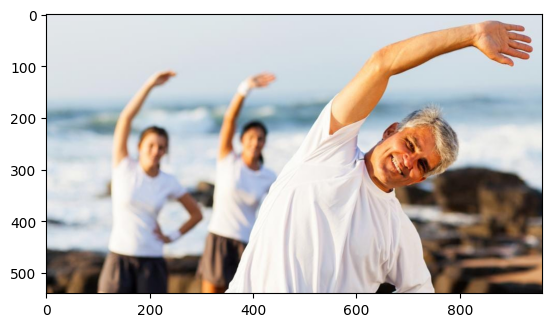

In [14]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [15]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in ext list {}" .format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image at {}" .format(image_path))
            # os.remove(image_path)


libpng warning: iCCP: known incorrect sRGB profile


## Load the dataset

In [ ]:
tf.data.Dataset.??

In [16]:
import numpy as np
from matplotlib import pyplot as plt

In [17]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 256 files belonging to 2 classes.


In [18]:
data_iterators = data.as_numpy_iterator()

# Dataset Exploration
In this section, we explore the loaded dataset and visualize some sample images.

In [20]:
# get another batch from data_iterators
batch = data_iterators.next()

In [21]:
len(batch)

2

In [22]:
# images represent as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [23]:
# class 0 = happy
# class 1 = sad
batch[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int32)

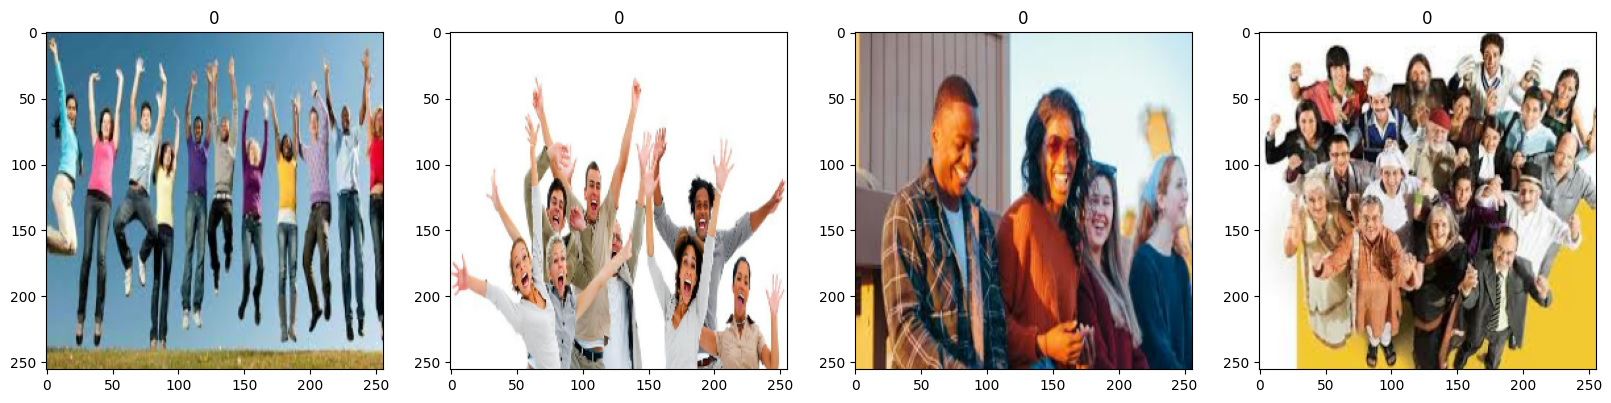

In [24]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [25]:
scaled = batch[0]/255

In [26]:
scaled[0].max()

1.0

## Data Preprocessing - Scaling
In this section, we scale the pixel values of the images to be between 0 and 1.

In [27]:
data = data.map(lambda x, y: (x/255, y))

In [28]:
scaled_iterator = data.as_numpy_iterator()

In [29]:
batch = scaled_iterator.next()

2023-07-27 03:58:21.672218: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


In [30]:
batch[0].max()

1.0

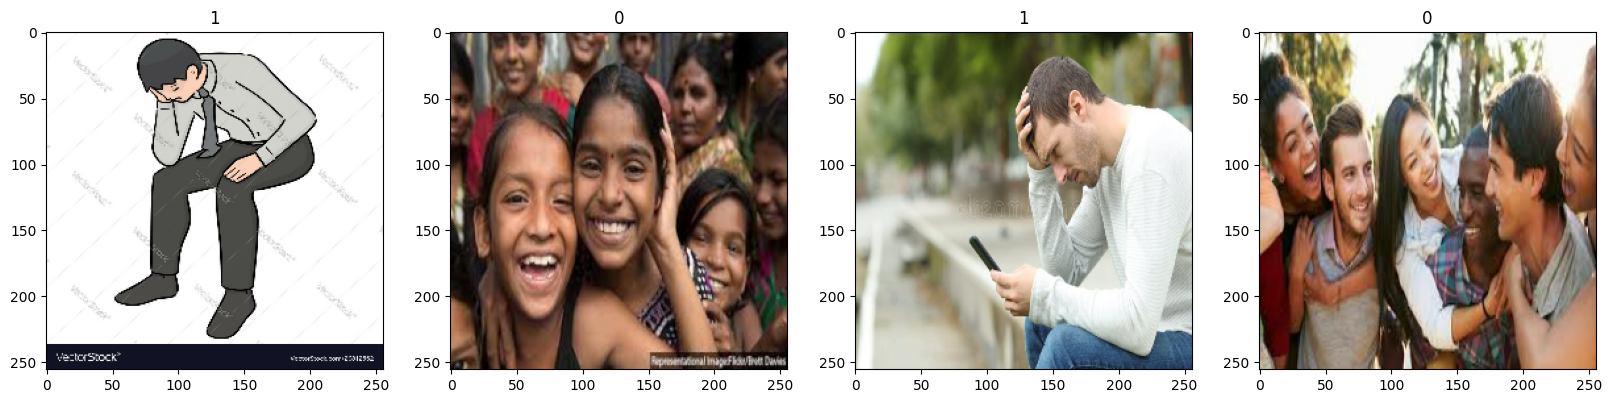

In [31]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [32]:
len(data)

8

## Data Splitting
In this section, we split the dataset into training, validation, and test sets.

In [33]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [34]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [35]:
len(test)

1

# DEEP MODEL
## good stuff

## Model Architecture
In this section, we define the CNN model architecture using Keras. We use the Sequential model from Keras to define the CNN. The model consists of 3 convolutional layers with a ReLU activation function and max pooling layers in between. At the end of the model, we have a fully connected layer with a sigmoid activation function. We use the Adam optimizer and categorical cross entropy as the loss function.

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [37]:
model = Sequential()

```{mermaid}
graph LR
  A[Input Layer] --> B[Convolutional Layer 1]
  B --> C[MaxPooling Layer 1]
  C --> D[Convolutional Layer 2]
  D --> E[MaxPooling Layer 2]
  E --> F[Convolutional Layer 3]
  F --> G[MaxPooling Layer 3]
  G --> H[Flatten Layer]
  H --> I[Dense Layer 1]
  I --> J[Output Layer]

  style A fill:#f9f,stroke:#333,stroke-width:2px
  style B fill:#f9f,stroke:#333,stroke-width:2px
  style C fill:#f9f,stroke:#333,stroke-width:2px
  style D fill:#f9f,stroke:#333,stroke-width:2px
  style E fill:#f9f,stroke:#333,stroke-width:2px
  style F fill:#f9f,stroke:#333,stroke-width:2px
  style G fill:#f9f,stroke:#333,stroke-width:2px
  style H fill:#f9f,stroke:#333,stroke-width:2px
  style I fill:#f9f,stroke:#333,stroke-width:2px
  style J fill:#f9f,stroke:#333,stroke-width:2px

```

In [38]:
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [39]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

# Model Training

## another good stuff

In this section, we train the CNN model on the training and validation sets.

In [41]:
log_dir = "logs"

In [42]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [43]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2023-07-27 04:03:14.023704: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 2.1236 - accuracy: 0.6250

2023-07-27 04:03:18.255534: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 6s 852ms/step - loss: 2.1236 - accuracy: 0.6250 - val_loss: 1.0543 - val_accuracy: 0.3281
Epoch 2/20


2023-07-27 04:03:19.815394: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.7020 - accuracy: 0.5750

2023-07-27 04:03:23.174734: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 5s 752ms/step - loss: 0.7020 - accuracy: 0.5750 - val_loss: 0.5787 - val_accuracy: 0.6719
Epoch 3/20


2023-07-27 04:03:24.809815: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.4572 - accuracy: 0.7688

2023-07-27 04:03:28.622819: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 6s 886ms/step - loss: 0.4572 - accuracy: 0.7688 - val_loss: 0.4715 - val_accuracy: 0.7188
Epoch 4/20


2023-07-27 04:03:30.526848: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.4542 - accuracy: 0.7688

2023-07-27 04:03:34.421046: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 6s 864ms/step - loss: 0.4542 - accuracy: 0.7688 - val_loss: 0.5098 - val_accuracy: 0.7188
Epoch 5/20


2023-07-27 04:03:36.104529: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.4182 - accuracy: 0.8062

2023-07-27 04:03:39.478804: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 5s 749ms/step - loss: 0.4182 - accuracy: 0.8062 - val_loss: 0.3729 - val_accuracy: 0.9062
Epoch 6/20


2023-07-27 04:03:41.039956: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.3648 - accuracy: 0.8313

2023-07-27 04:03:44.435770: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 5s 734ms/step - loss: 0.3648 - accuracy: 0.8313 - val_loss: 0.2589 - val_accuracy: 0.9375
Epoch 7/20


2023-07-27 04:03:45.963591: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.2975 - accuracy: 0.9312

2023-07-27 04:03:49.178376: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 5s 735ms/step - loss: 0.2975 - accuracy: 0.9312 - val_loss: 0.3374 - val_accuracy: 0.7812
Epoch 8/20


2023-07-27 04:03:50.743021: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.2943 - accuracy: 0.8687

2023-07-27 04:03:54.037560: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 5s 768ms/step - loss: 0.2943 - accuracy: 0.8687 - val_loss: 0.2920 - val_accuracy: 0.9062
Epoch 9/20


2023-07-27 04:03:55.951233: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.1788 - accuracy: 0.9750

2023-07-27 04:04:01.456234: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 8s 1s/step - loss: 0.1788 - accuracy: 0.9750 - val_loss: 0.2523 - val_accuracy: 0.9062
Epoch 10/20


2023-07-27 04:04:03.457572: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.2026 - accuracy: 0.9375

2023-07-27 04:04:08.061141: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 7s 1s/step - loss: 0.2026 - accuracy: 0.9375 - val_loss: 0.1680 - val_accuracy: 0.9375
Epoch 11/20


2023-07-27 04:04:10.113932: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.1517 - accuracy: 0.9563

2023-07-27 04:04:13.776048: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 6s 898ms/step - loss: 0.1517 - accuracy: 0.9563 - val_loss: 0.1164 - val_accuracy: 0.9688
Epoch 12/20


2023-07-27 04:04:15.621654: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.1141 - accuracy: 0.9875

2023-07-27 04:04:19.308929: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 6s 883ms/step - loss: 0.1141 - accuracy: 0.9875 - val_loss: 0.1531 - val_accuracy: 0.9531
Epoch 13/20


2023-07-27 04:04:21.379377: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.1109 - accuracy: 0.9688

2023-07-27 04:04:25.076040: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 5s 796ms/step - loss: 0.1109 - accuracy: 0.9688 - val_loss: 0.0471 - val_accuracy: 1.0000
Epoch 14/20


2023-07-27 04:04:26.674164: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.0717 - accuracy: 0.9812

2023-07-27 04:04:30.163587: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 5s 796ms/step - loss: 0.0717 - accuracy: 0.9812 - val_loss: 0.0218 - val_accuracy: 1.0000
Epoch 15/20


2023-07-27 04:04:31.851561: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.0526 - accuracy: 0.9875

2023-07-27 04:04:34.950114: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 5s 695ms/step - loss: 0.0526 - accuracy: 0.9875 - val_loss: 0.0296 - val_accuracy: 0.9844
Epoch 16/20


2023-07-27 04:04:36.486424: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.0416 - accuracy: 0.9937

2023-07-27 04:04:39.724312: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 5s 768ms/step - loss: 0.0416 - accuracy: 0.9937 - val_loss: 0.0382 - val_accuracy: 1.0000
Epoch 17/20


2023-07-27 04:04:41.355761: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.0256 - accuracy: 0.9937

2023-07-27 04:04:45.180619: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 5s 900ms/step - loss: 0.0256 - accuracy: 0.9937 - val_loss: 0.0402 - val_accuracy: 0.9844
Epoch 18/20


2023-07-27 04:04:46.793976: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.0400 - accuracy: 0.9937

2023-07-27 04:04:52.472749: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 7s 1s/step - loss: 0.0400 - accuracy: 0.9937 - val_loss: 0.0165 - val_accuracy: 1.0000
Epoch 19/20


2023-07-27 04:04:54.119024: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.0165 - accuracy: 1.0000

2023-07-27 04:04:57.169953: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 5s 788ms/step - loss: 0.0165 - accuracy: 1.0000 - val_loss: 0.0145 - val_accuracy: 1.0000
Epoch 20/20


2023-07-27 04:04:59.122699: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.0105 - accuracy: 1.0000

2023-07-27 04:05:03.629668: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 6s 1s/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.0081 - val_accuracy: 1.0000


In [44]:
hist.history

{'loss': [2.1235644817352295,
  0.7019603252410889,
  0.4572330415248871,
  0.4541848301887512,
  0.41823139786720276,
  0.3647550344467163,
  0.29748818278312683,
  0.2943264842033386,
  0.178763285279274,
  0.20261912047863007,
  0.15168893337249756,
  0.11407314240932465,
  0.11092028766870499,
  0.07170285284519196,
  0.05255885794758797,
  0.04164768010377884,
  0.02555043436586857,
  0.03998959809541702,
  0.01653195358812809,
  0.01046471856534481],
 'accuracy': [0.625,
  0.574999988079071,
  0.768750011920929,
  0.768750011920929,
  0.8062499761581421,
  0.831250011920929,
  0.9312499761581421,
  0.8687499761581421,
  0.9750000238418579,
  0.9375,
  0.956250011920929,
  0.987500011920929,
  0.96875,
  0.981249988079071,
  0.987500011920929,
  0.9937499761581421,
  0.9937499761581421,
  0.9937499761581421,
  1.0,
  1.0],
 'val_loss': [1.0542879104614258,
  0.5787237286567688,
  0.4715065360069275,
  0.5098134875297546,
  0.3729403614997864,
  0.2589319348335266,
  0.337356477975

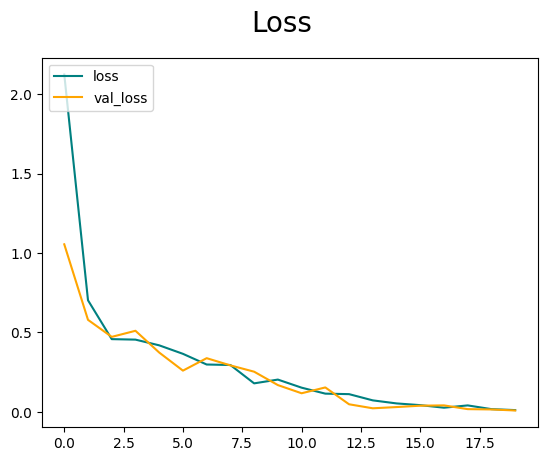

In [45]:
fig = plt.figure()
plt.plot(hist.history["loss"], color="teal", label="loss")
plt.plot(hist.history["val_loss"], color="orange", label="val_loss")
fig.suptitle("Loss", fontsize=20)
plt.legend(loc="upper left")
plt.show()

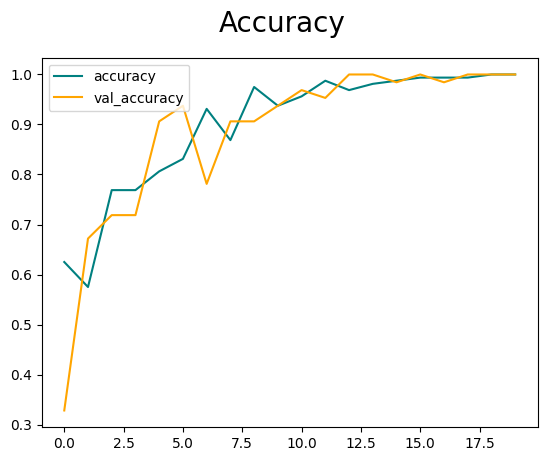

In [46]:
fig = plt.figure()
plt.plot(hist.history["accuracy"], color="teal", label="accuracy")
plt.plot(hist.history["val_accuracy"], color="orange", label="val_accuracy")
fig.suptitle("Accuracy", fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Model Evaluation
In this section, we evaluate the trained model on the test set.

In [47]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [48]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [49]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2023-07-27 04:11:53.386443: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/1 [==============================] - 0s 329ms/step


In [50]:
print("Precision: {}" .format(pre.result().numpy()))
print("Recall: {}" .format(re.result().numpy()))
print("Accuracy: {}" .format(acc.result().numpy()))

Precision: 1.0
Recall: 1.0
Accuracy: 1.0


## Model Testing
In this section, we test the trained model on a new image.

In [51]:
import cv2

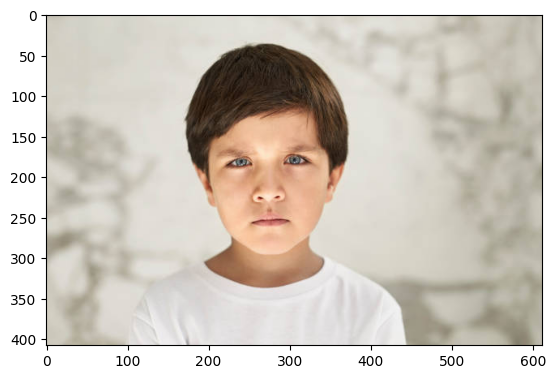

In [52]:
img = cv2.imread("sad_test.jpeg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

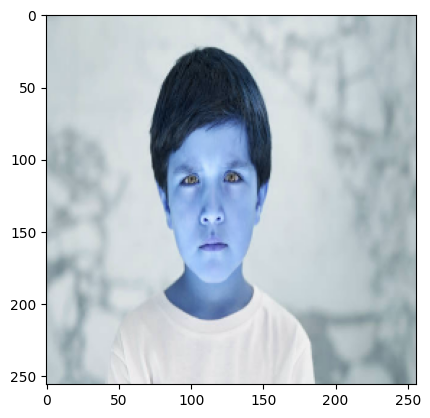

In [53]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [54]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [55]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 68ms/step


array([[0.96018517]], dtype=float32)

In [56]:
if yhat < .5:
    print("Happy")
else:
    print("Sad")

Sad


## Model Saving and Loading
In this section, we save the trained model to disk and load it back for future use.

In [57]:
from tensorflow.keras.models import load_model
model.save(os.path.join("models","happysadmodel.h5"))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [58]:
new_model = load_model(os.path.join("models","happysadmodel.h5"))


In [59]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 60ms/step


In [60]:
if yhat_new < .5:
    print("Happy")
else:
    print("Sad")

Sad


This notebook showcases the complete process of building, training, evaluating, and testing an image classification model for recognizing "happy" or "sad" emotions using Convolutional Neural Networks. The trained model can be saved and reloaded for future use, making it suitable for various real-world applications.